In [ ]:
!pip install gensim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('drive/MyDrive/InfoQualityLab/WJH_citation_context_20240505.csv')
data.head()

,ID,Old_ID,DOI,Q1 - Review article? (Scopus),Q1 - Review article? (WoS),Q2 - Addendum or Neupane? (Scopus),Q2 - Addendum or Neupane? (WoS),Q3: Introduction section?,label in the reference list,Number of citation contexts,Citation marker,Citation context,Introduction section?,Author,Title,Year,Journal,Source,Other notes
0,1.0,0.0,10.1002/anie.201706532,n,n,n,n,n,10,1.0,10,We speculated that goupiolone B is biosyntheti...,n,"Matsuo Y., Yoshida A., Saito Y., Tanaka T.",Structural Revision and Biomimetic Synthesis o...,2017.0,ANGEWANDTE CHEMIE-INTERNATIONAL EDITION,"Scopus, Web of Science",NaN
1,2.0,1.0,10.1002/anie.201708266,n,n,n,n,n,10,2.0,"Refs. 5, 9, and 10",Nuclear magnetic resonance (NMR) is the most i...,n,"Grimme S., Bannwarth C., Dohm S., Hansen A., P...",Fully Automated Quantum-Chemistry-Based Comput...,2017.0,ANGEWANDTE CHEMIE-INTERNATIONAL EDITION,"Scopus, Web of Science",NaN
2,2.0,1.0,10.1002/anie.201708266,n,n,n,n,n,10,2.0,10,The crucial and thus far unsolved problem for ...,n,"Grimme S., Bannwarth C., Dohm S., Hansen A., P...",Fully Automated Quantum-Chemistry-Based Comput...,2017.0,ANGEWANDTE CHEMIE-INTERNATIONAL EDITION,"Scopus, Web of Science",NaN
3,3.0,2.0,10.1002/anie.201810566,n,n,n,n,n,14,1.0,"13, 14",An additional complication in the justicane ca...,n,"Elkin M., Scruse A.C., Turlik A., Newhouse T.R.",Computational and Synthetic Investigation of C...,2019.0,ANGEWANDTE CHEMIE-INTERNATIONAL EDITION,"Scopus, Web of Science","Recheck, the other citation is the Gaussian"
4,4.0,3.0,10.1002/anie.201902777,n,n,n,n,n,4,1.0,4,Determination of structure is a fundamental pi...,n,"Kutateladze A.G., Krenske E.H., Williams C.M.",Reassignments and Corroborations of Oxo-Bridge...,2019.0,ANGEWANDTE CHEMIE-INTERNATIONAL EDITION,"Scopus, Web of Science",NaN


done in 168.738s.
Extracting tf-idf features for NMF...
done in 0.328s.
Extracting tf features for LDA...
done in 0.184s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=100...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


done in 0.197s.


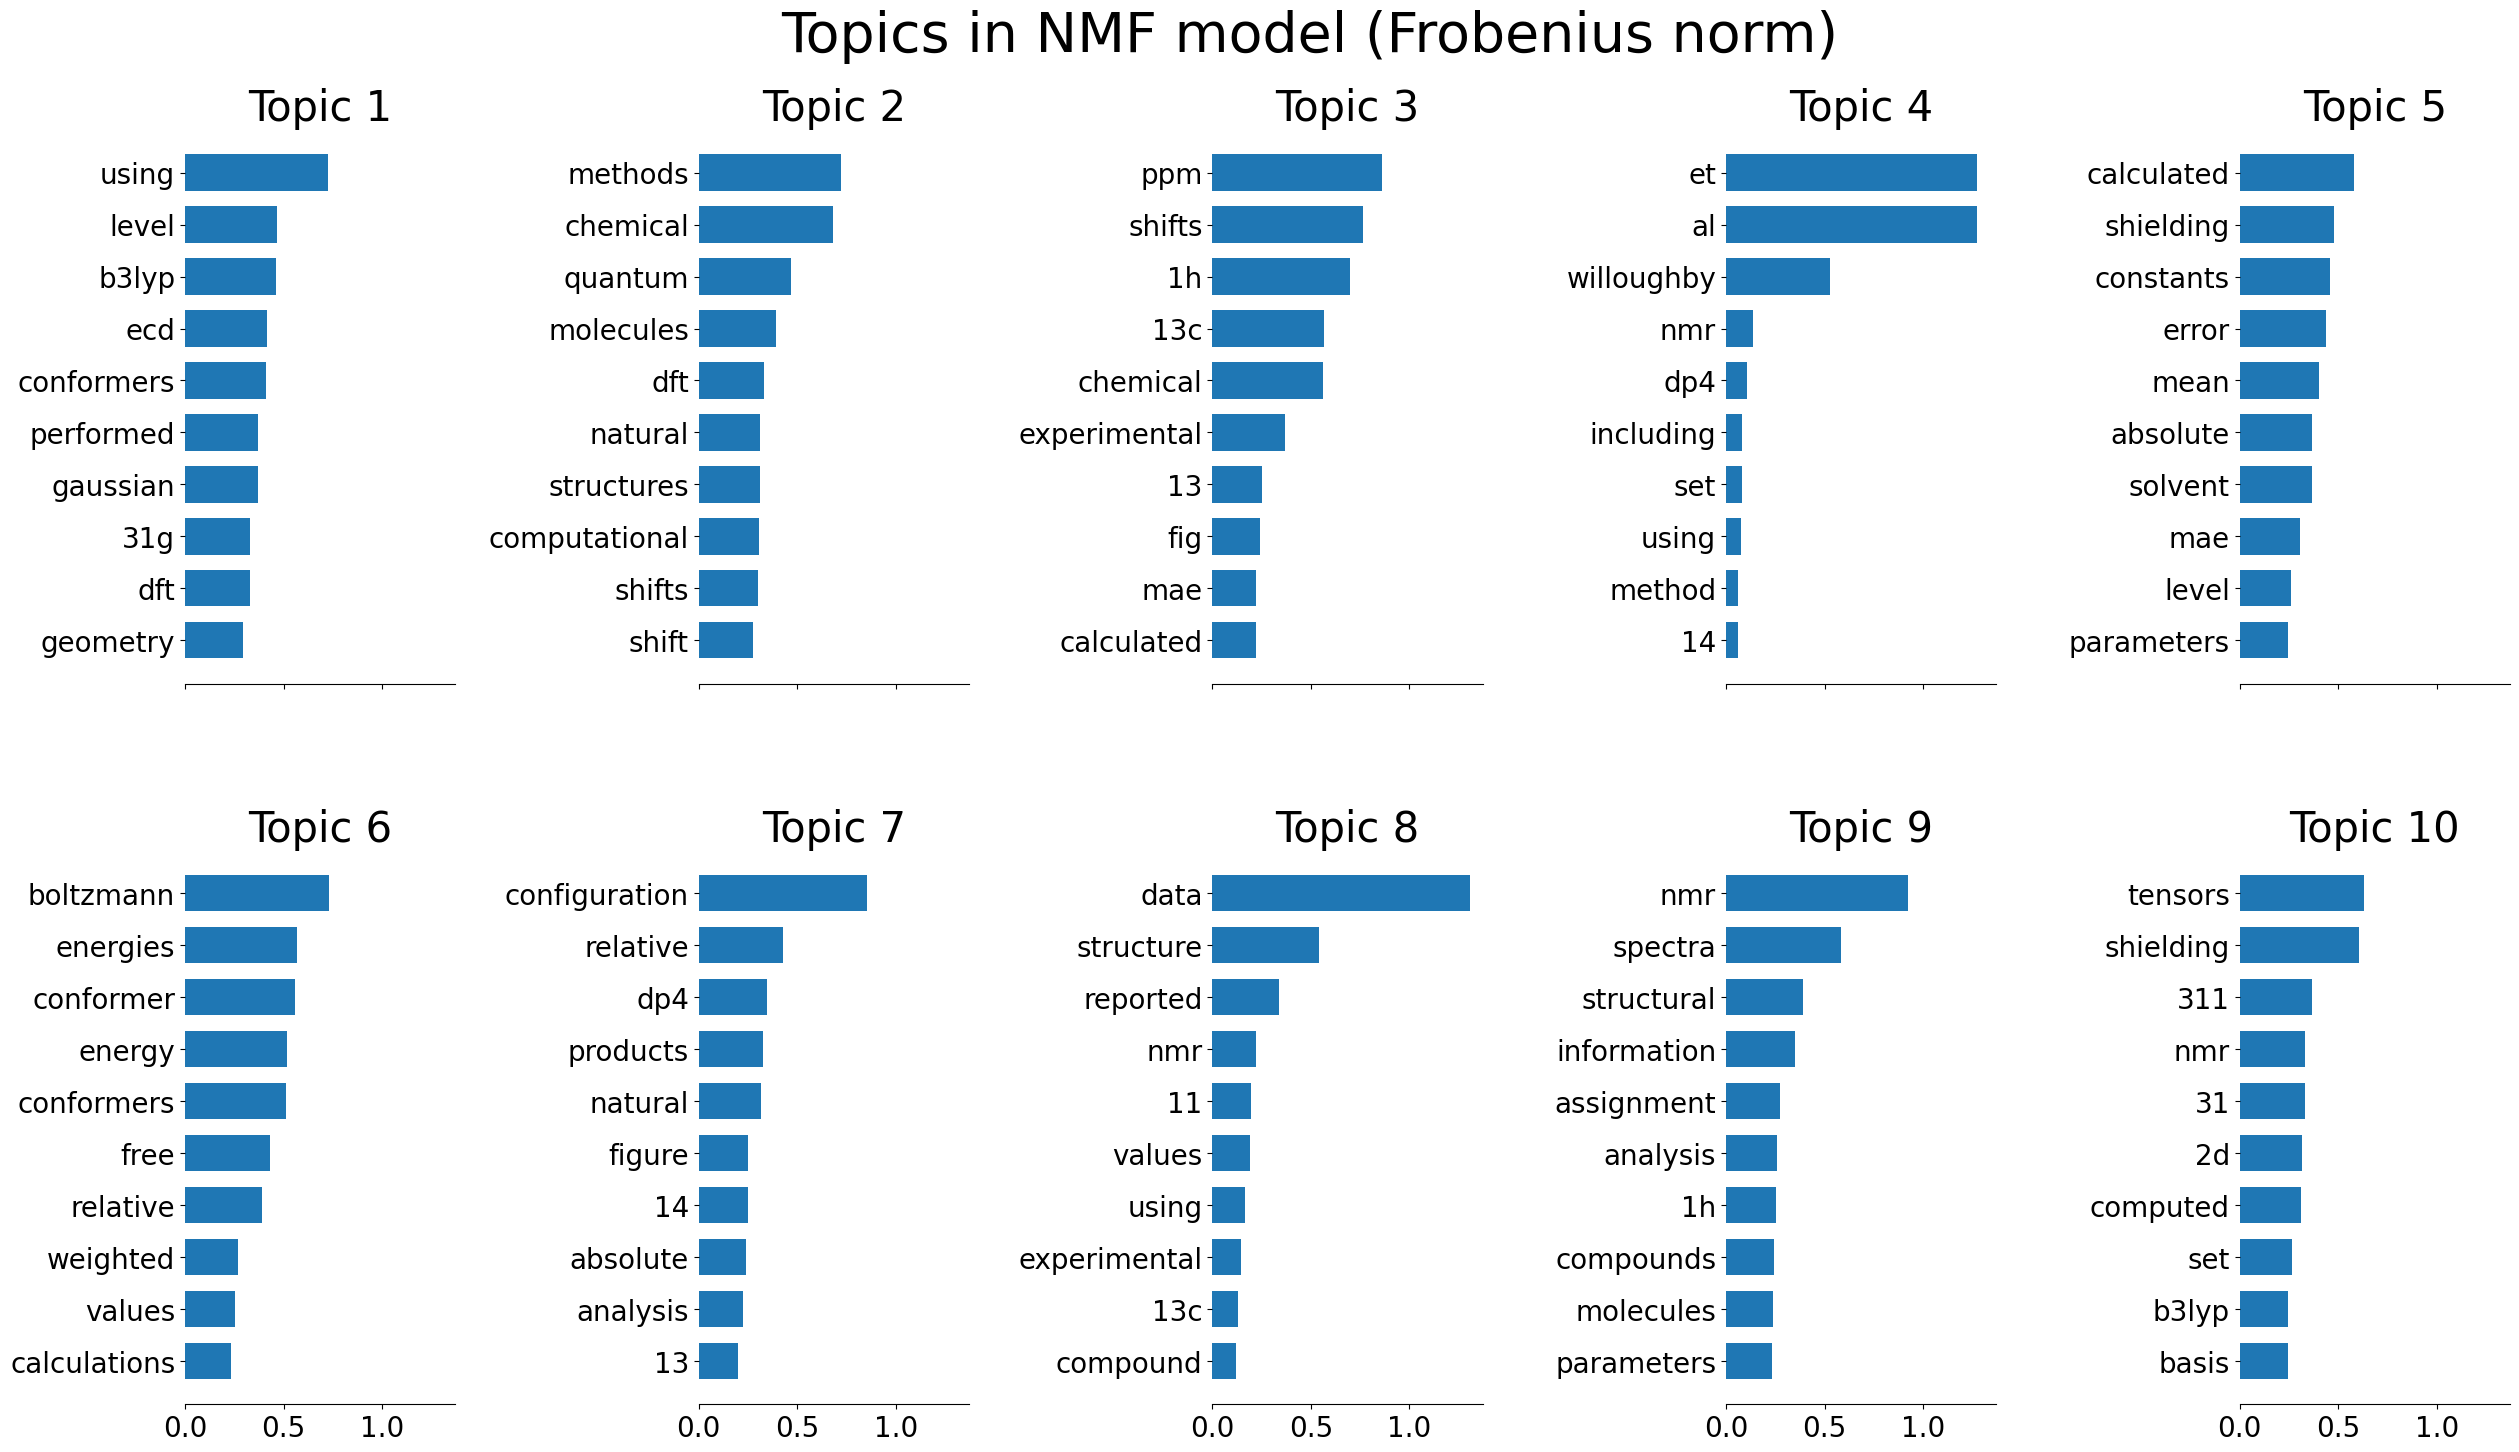



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=100...
done in 0.800s.


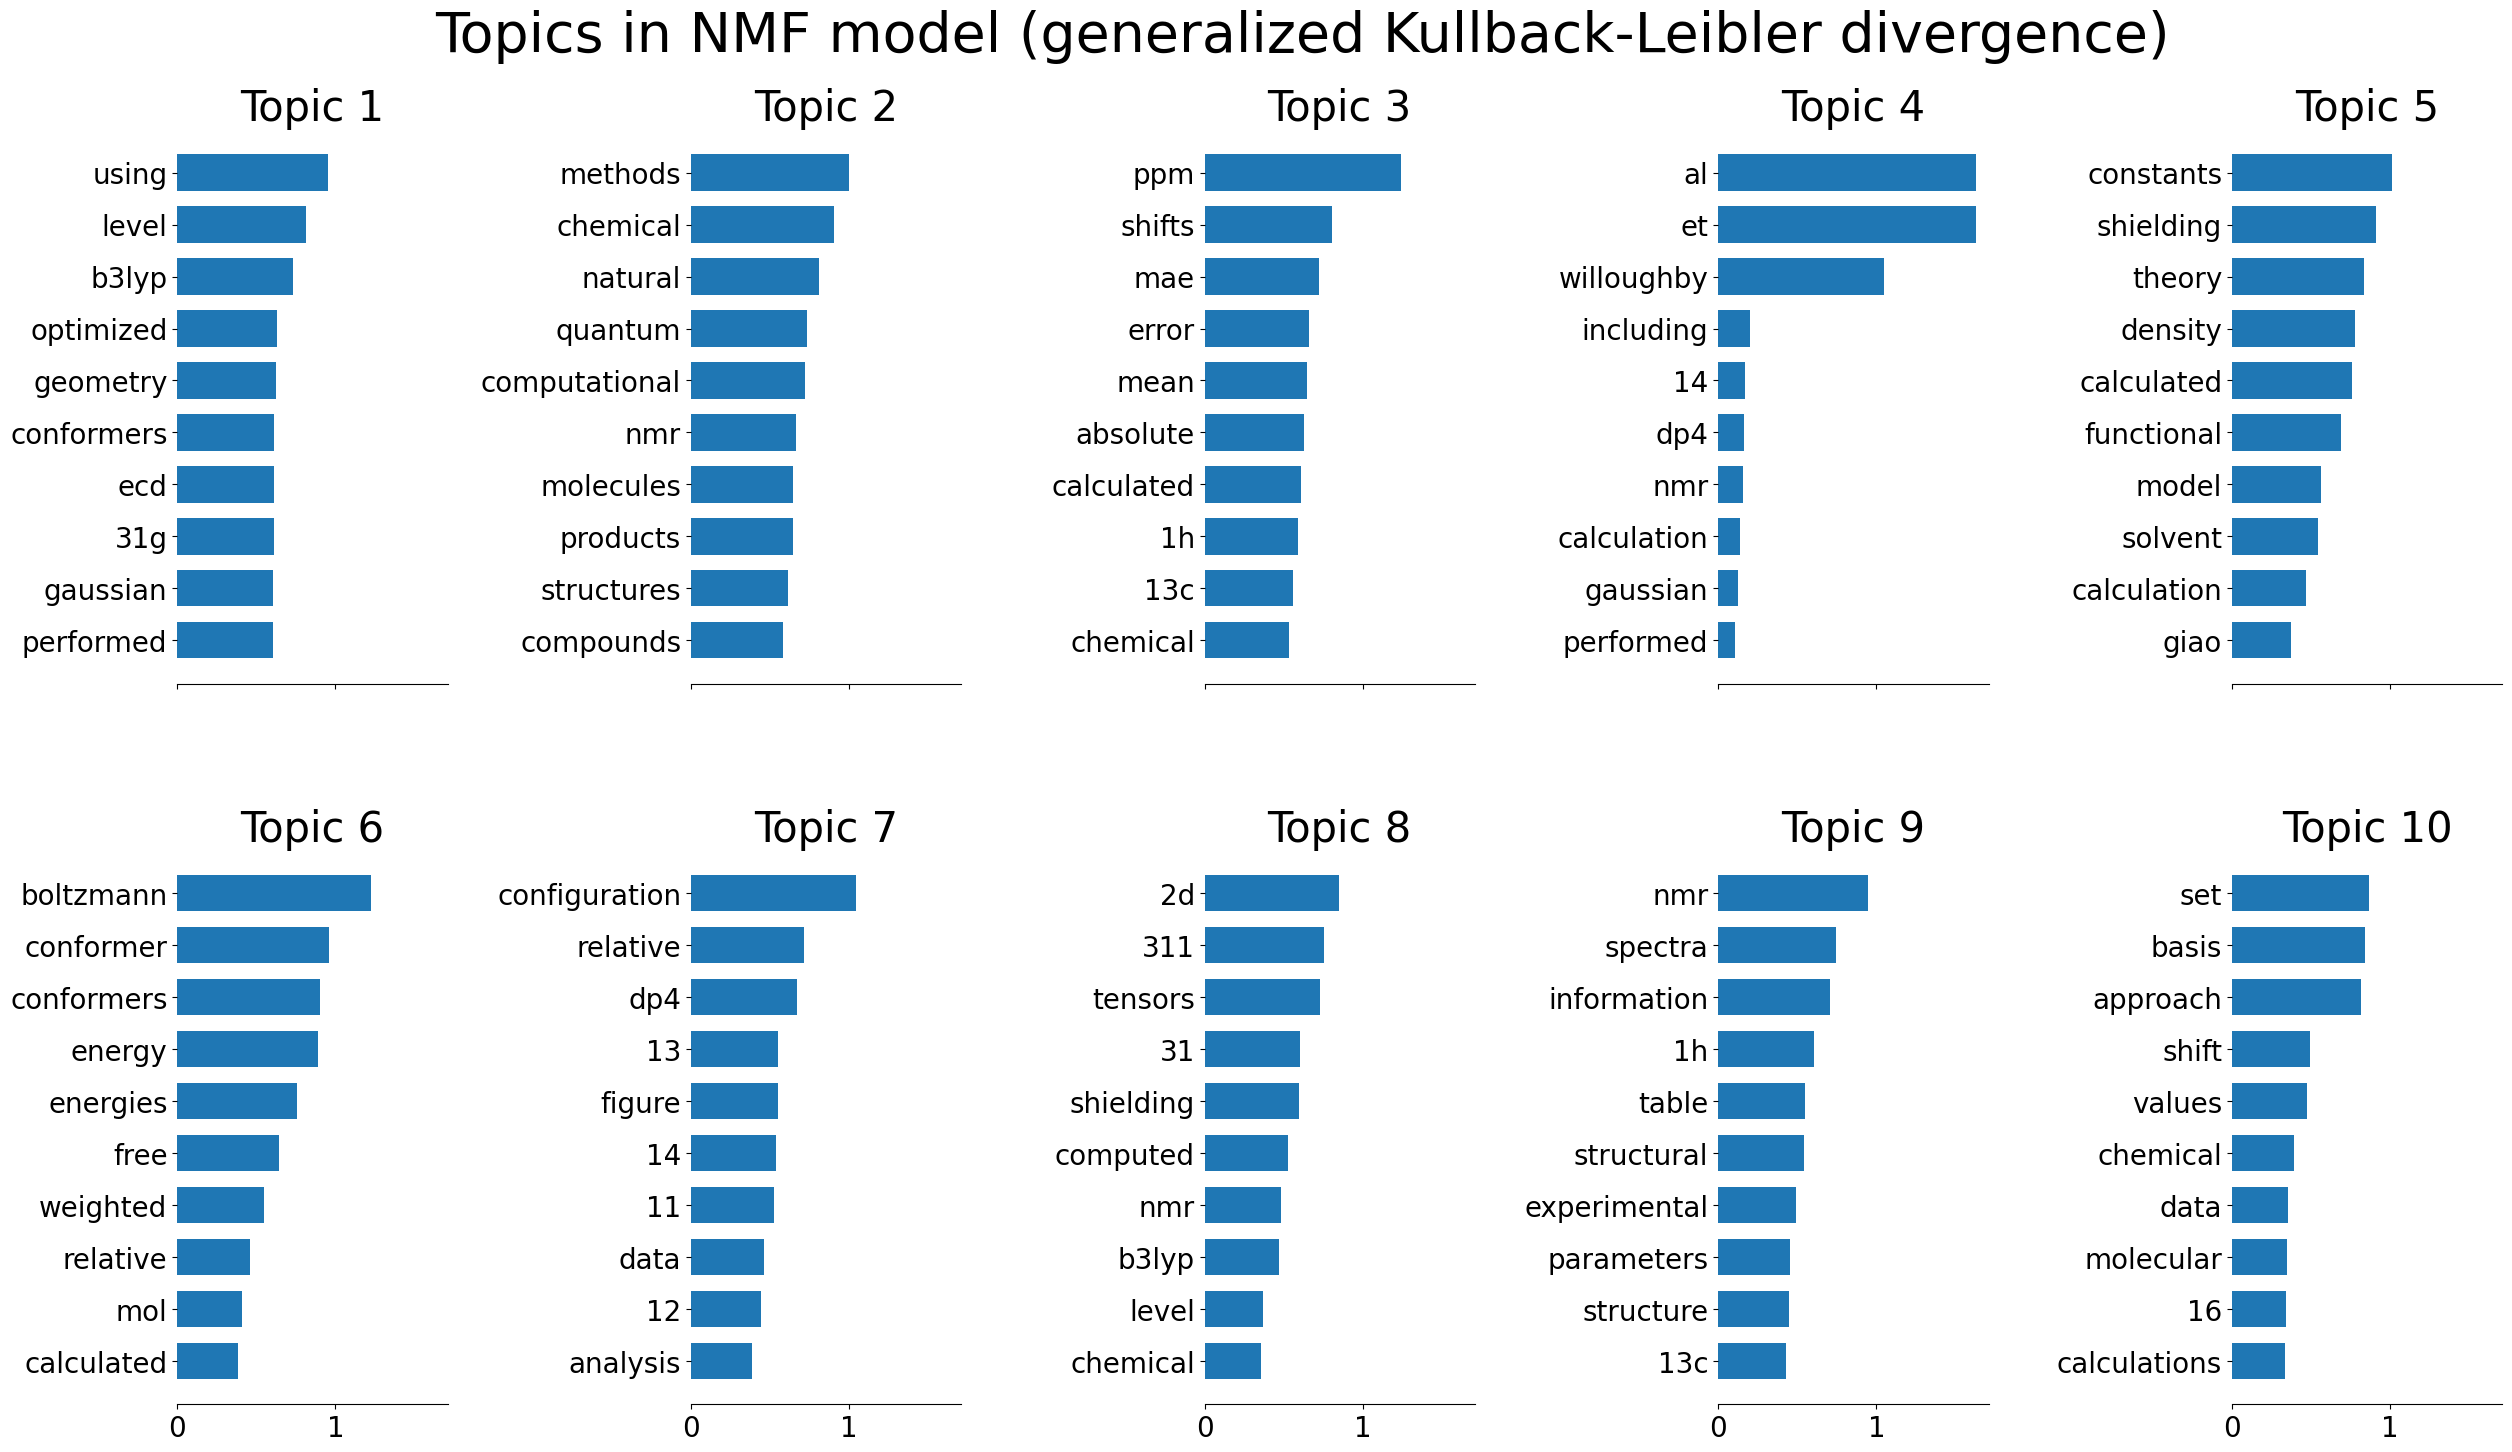



 Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=100, batch_size=128...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:2239: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


done in 1.057s.


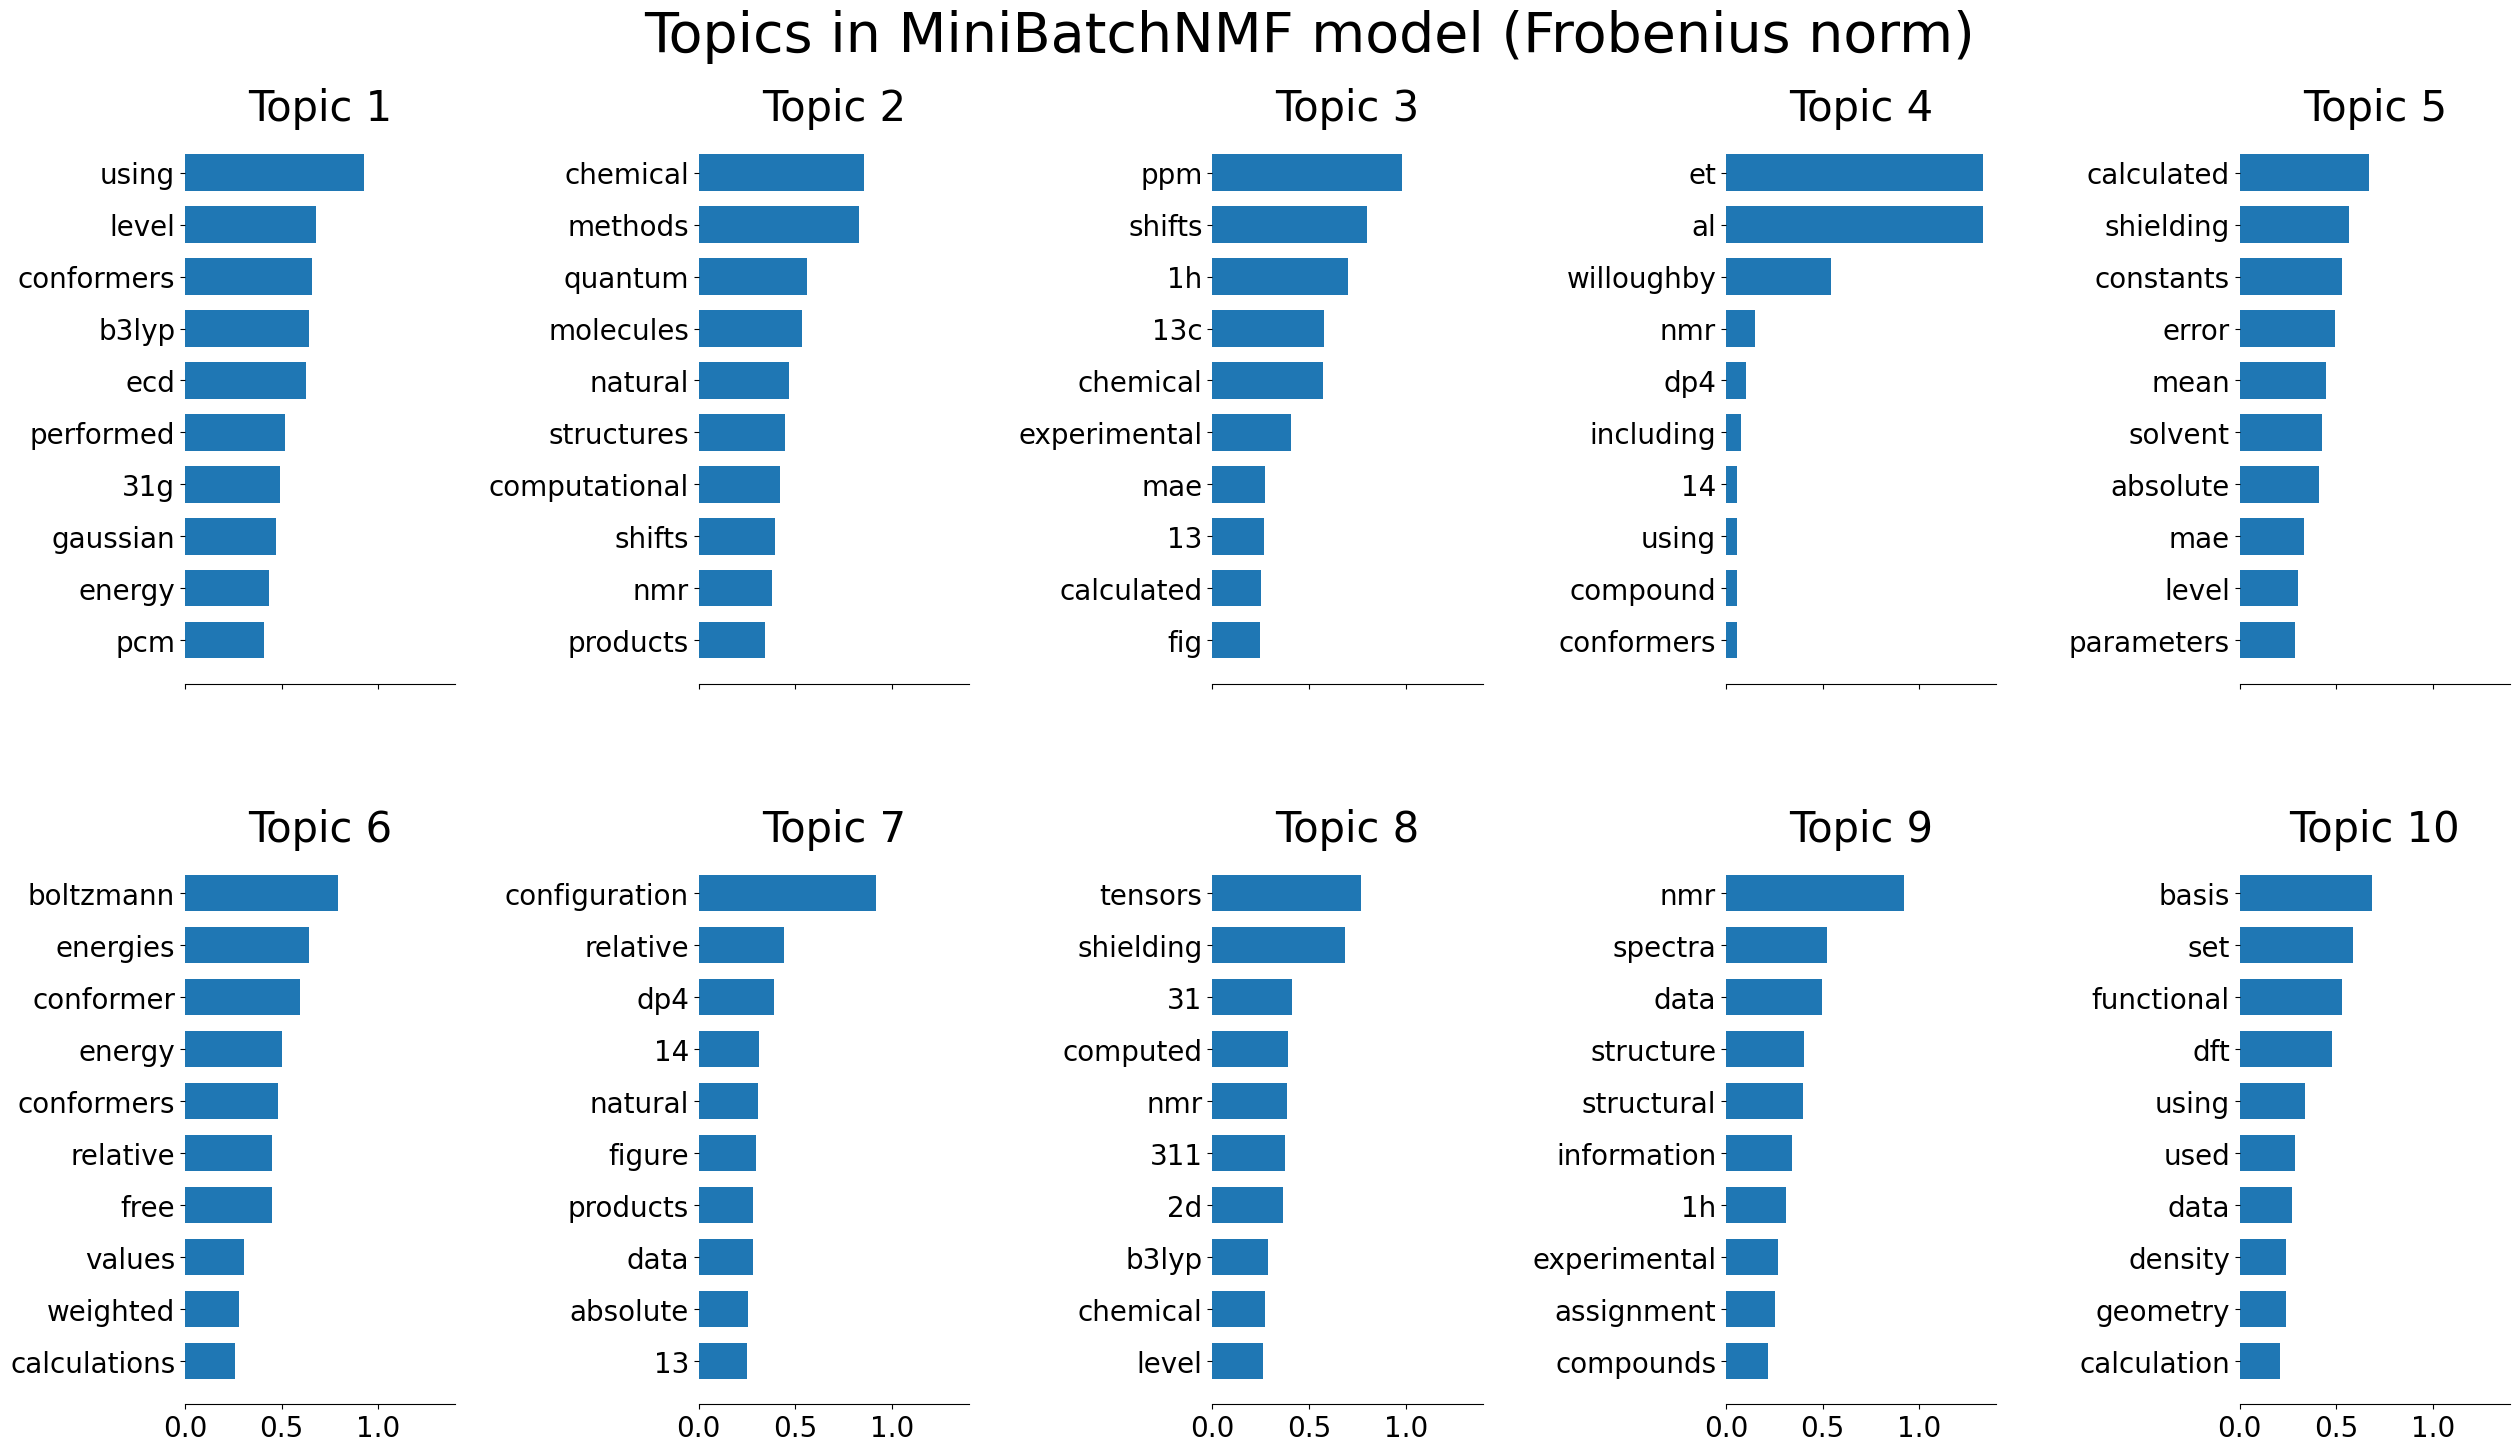



 Fitting the MiniBatchNMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=100, batch_size=128...
done in 2.863s.


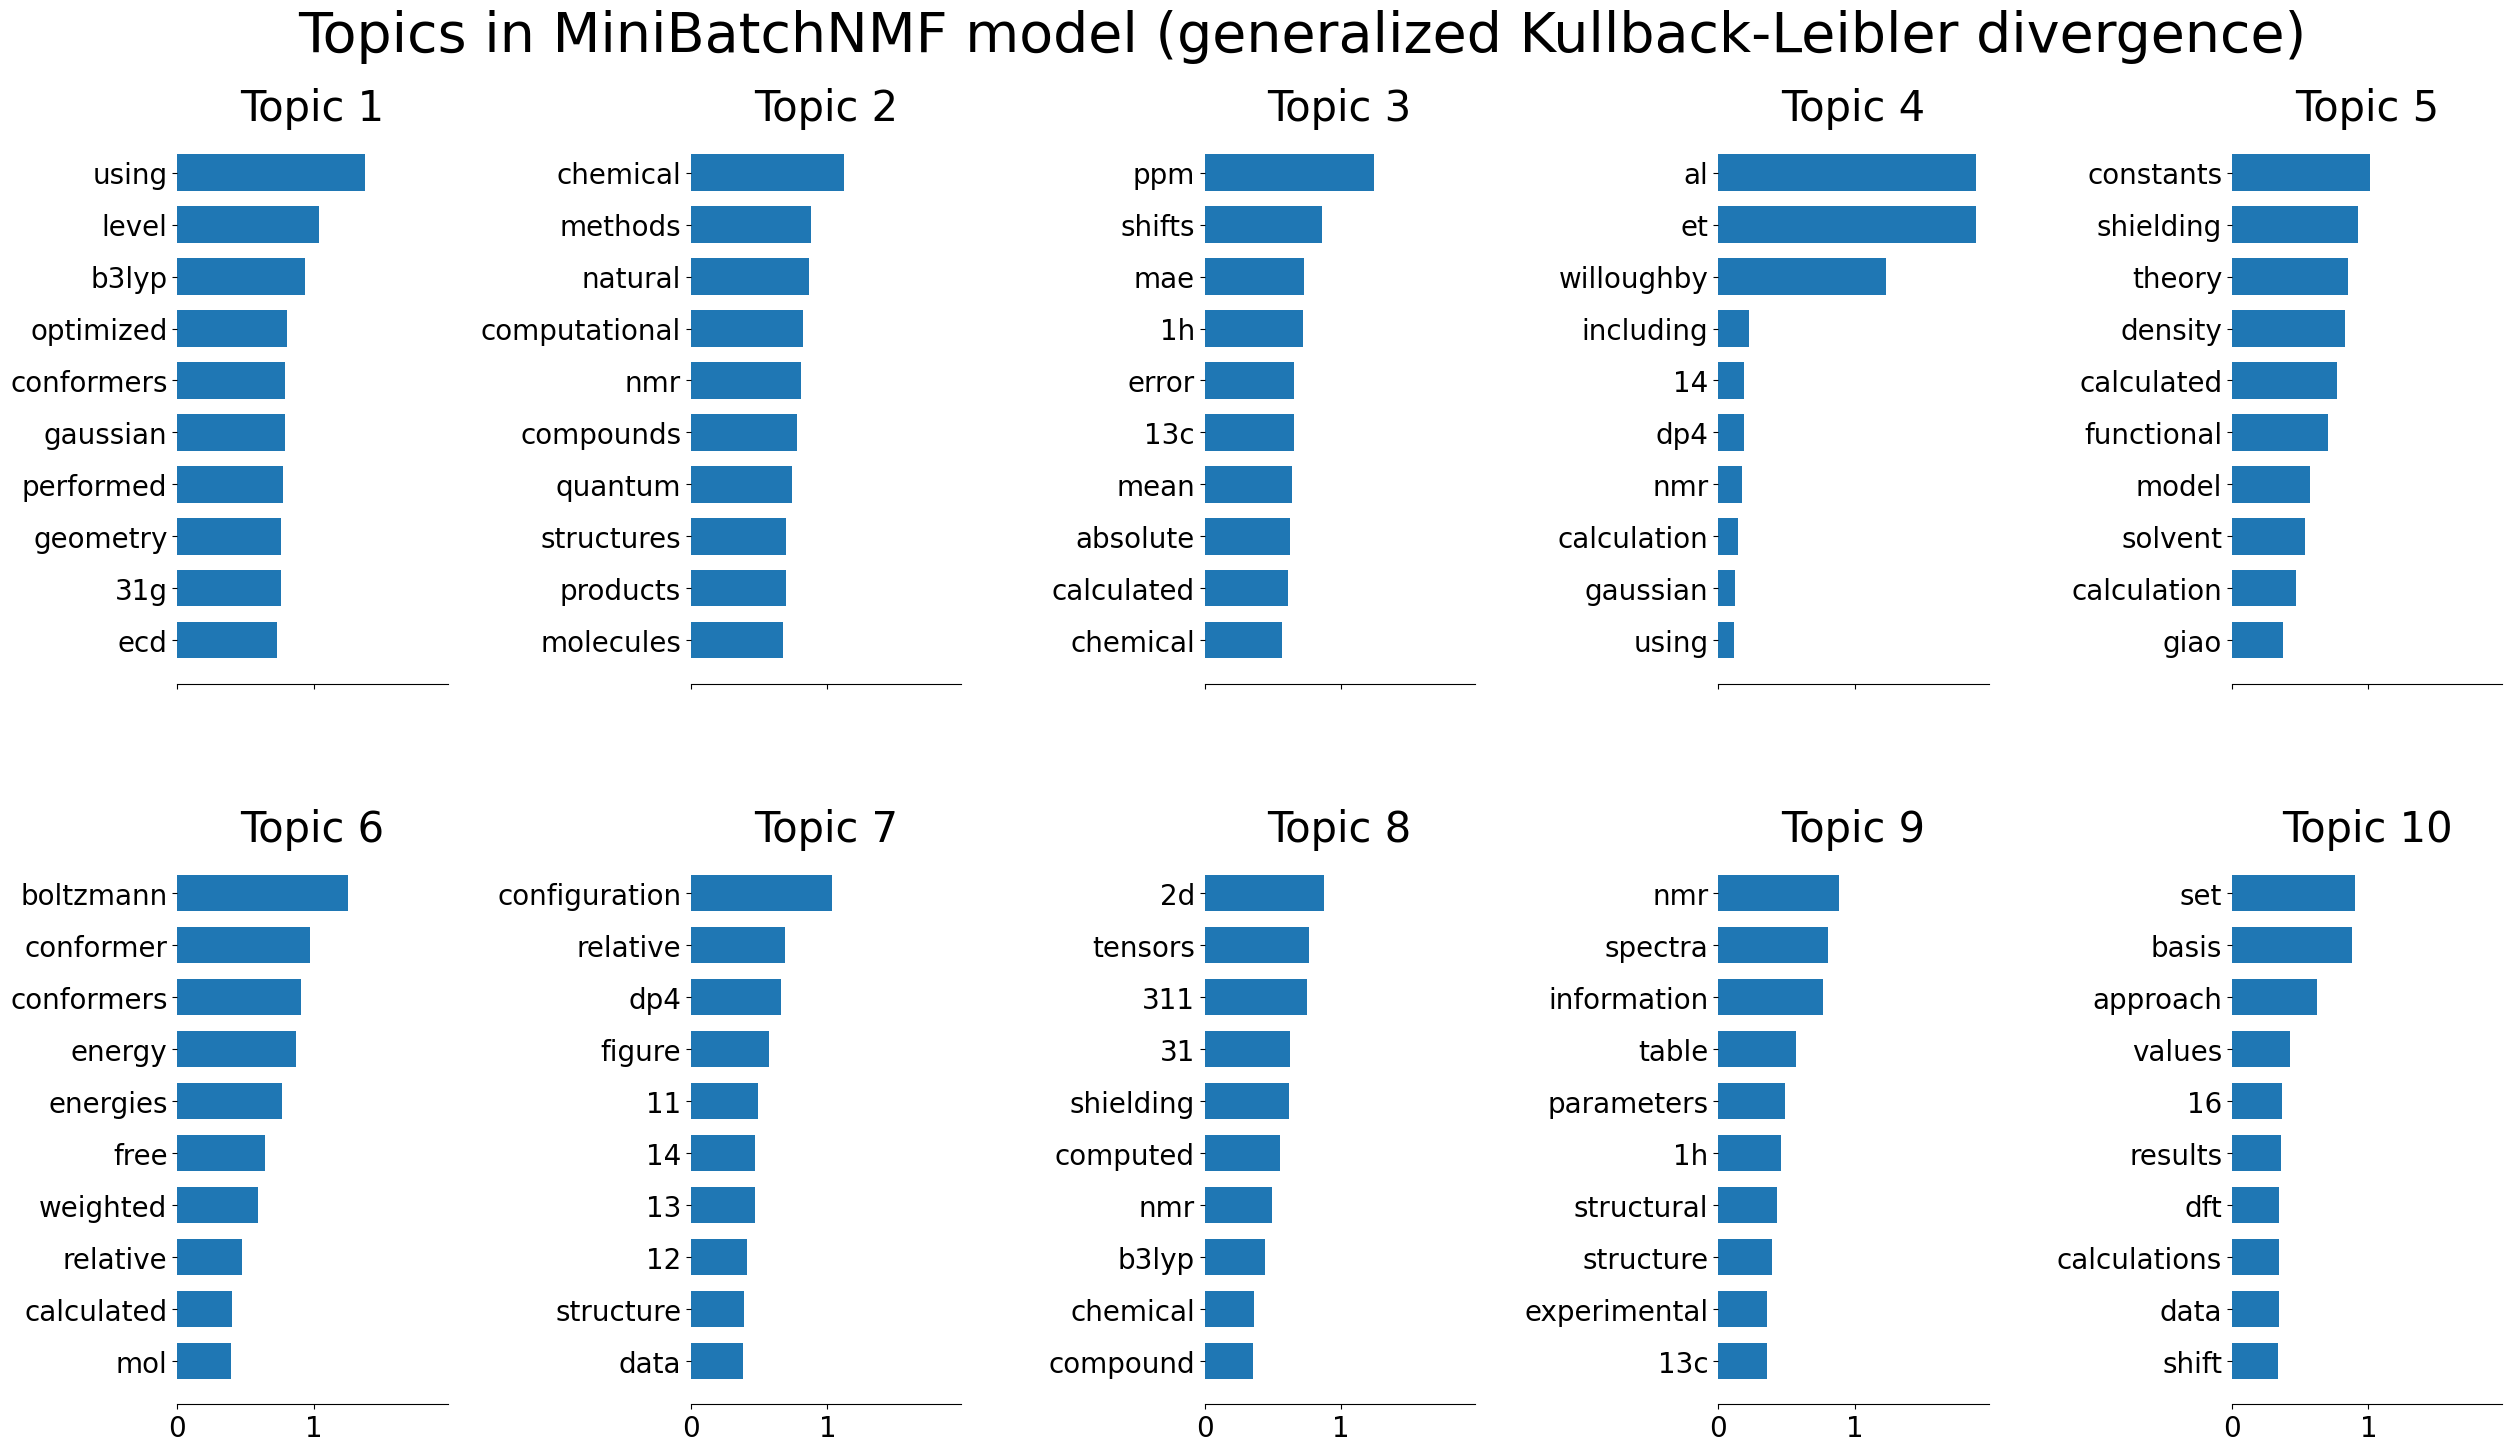



 Fitting LDA models with tf features, n_samples=2000 and n_features=100...
done in 1.161s.


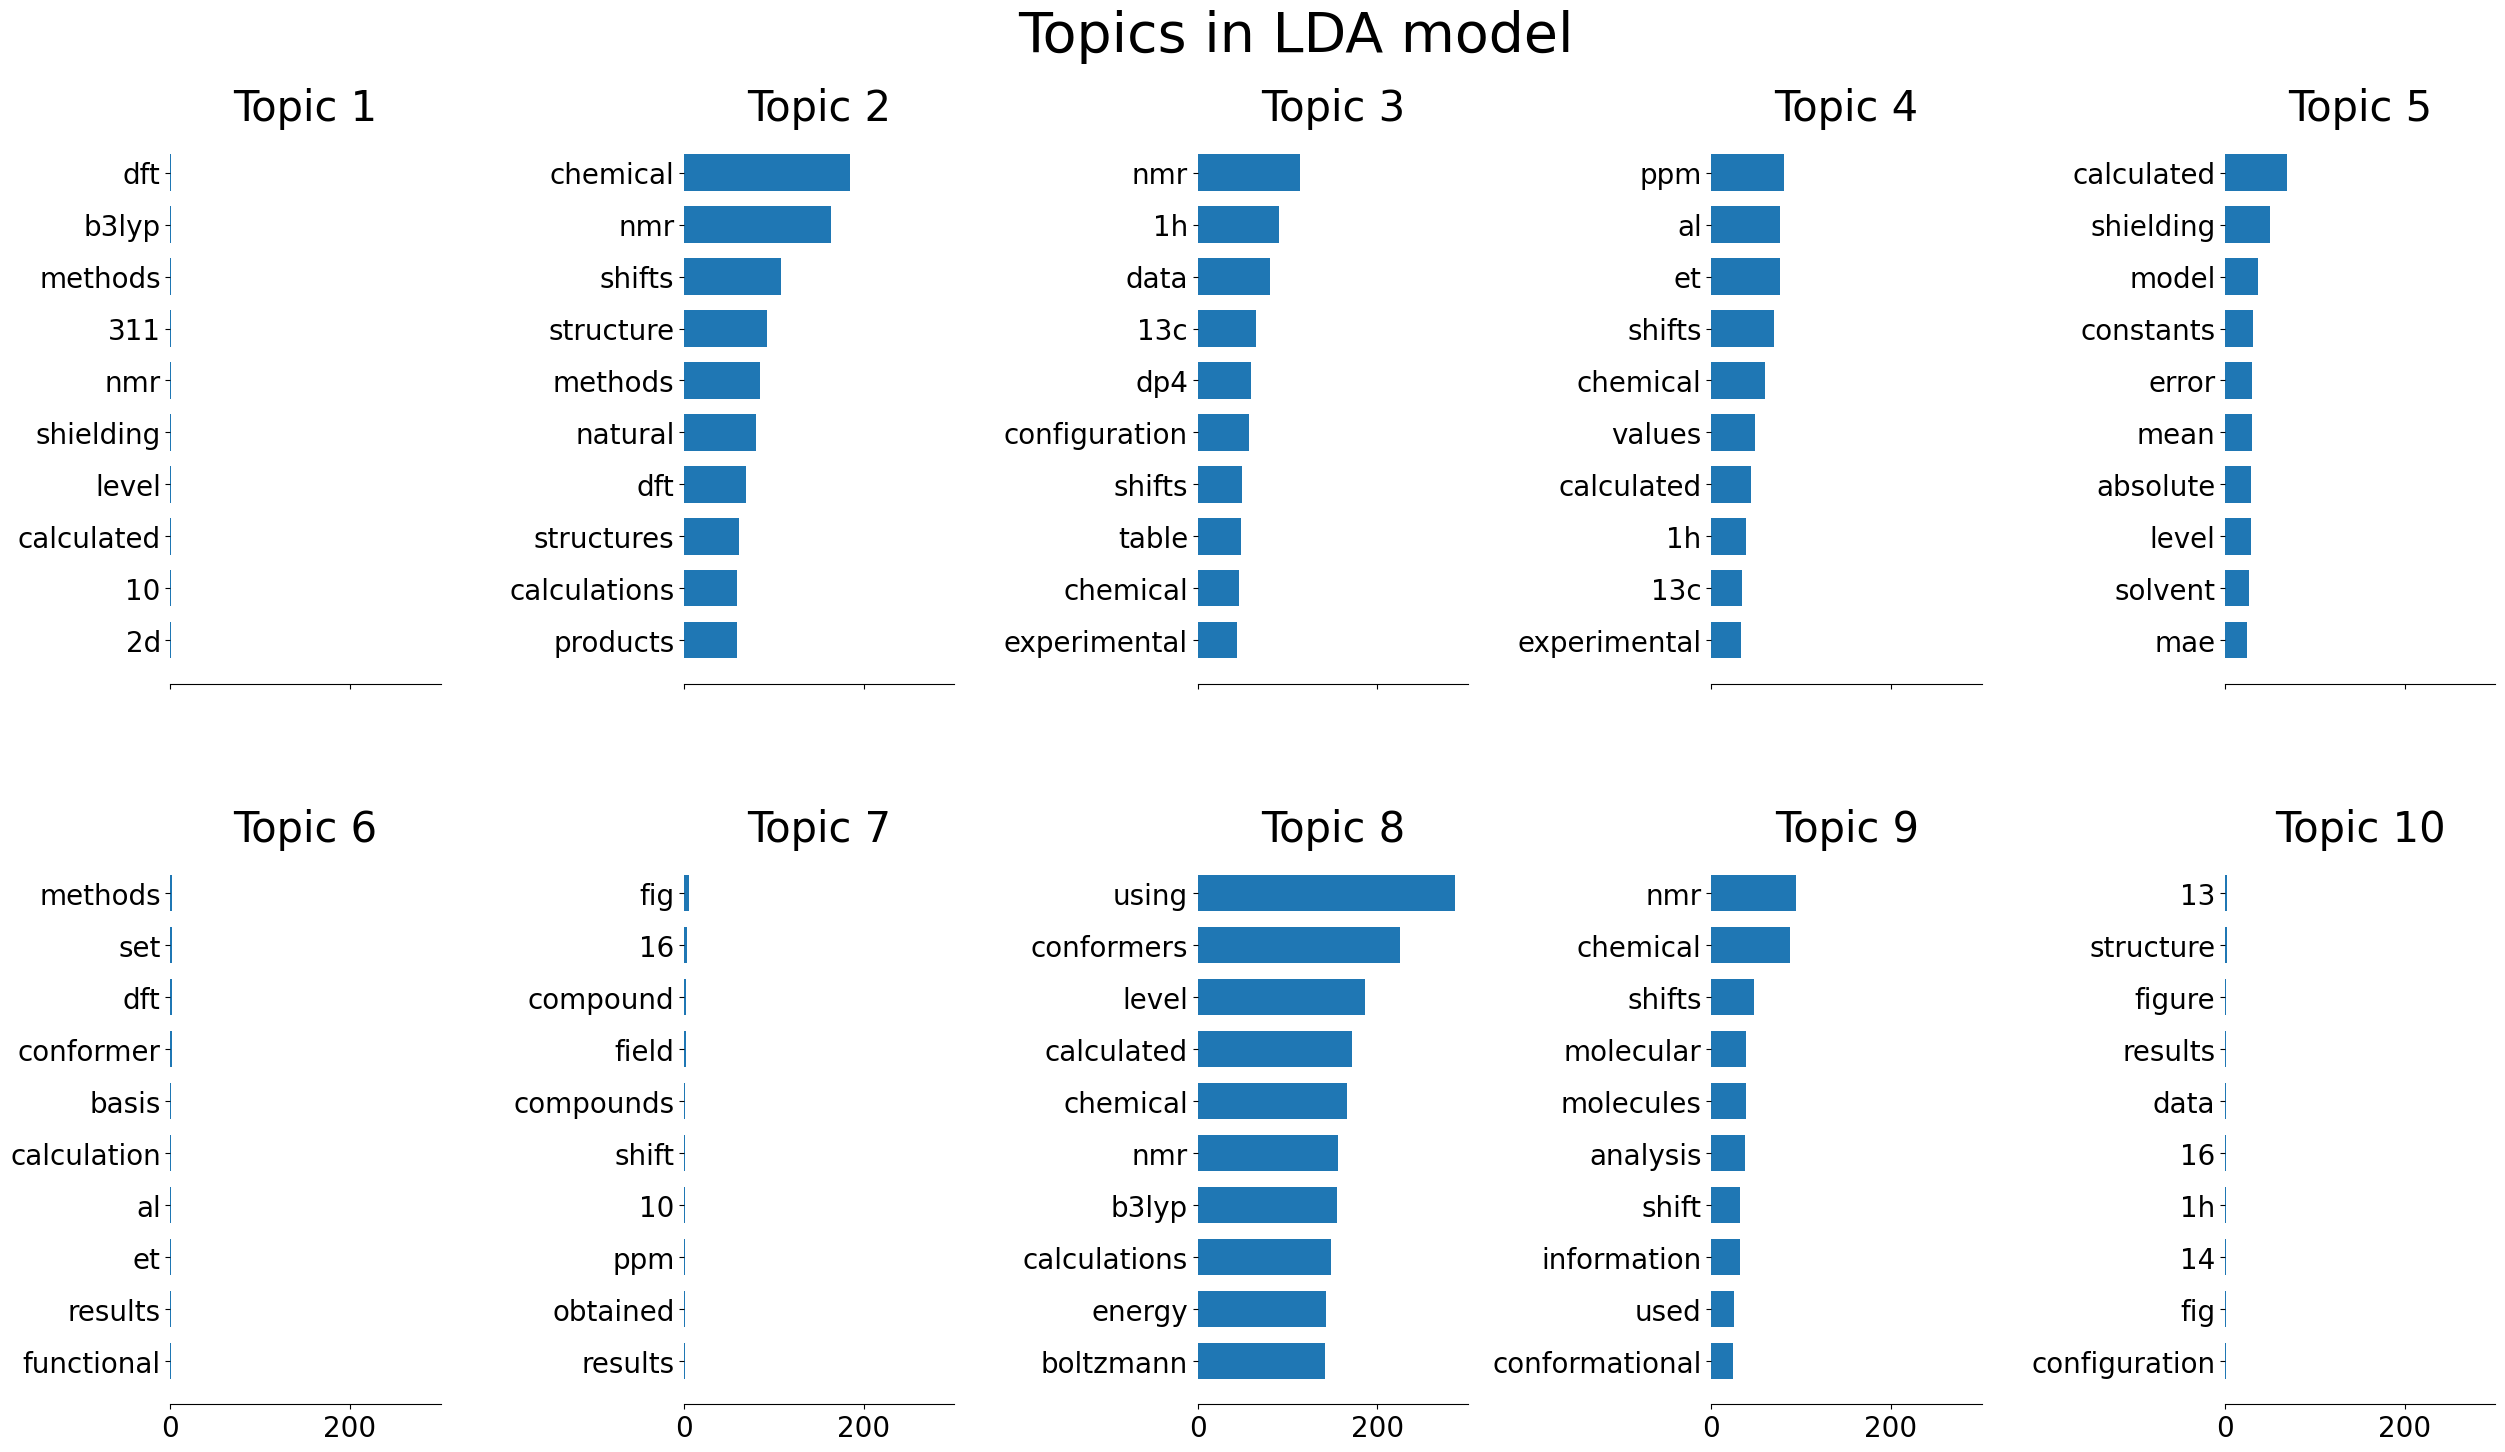

In [ ]:
# code from: https://scikit-learn.org/dev/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

data_samples = data[~data['Citation context'].isna()]['Citation context']

from time import time

import matplotlib.pyplot as plt

# from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

n_samples = 2000
n_features = 100
n_components = 10
n_top_words = 10
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

# print("Loading dataset...")
# t0 = time()
# data, _ = fetch_20newsgroups(
#     shuffle=True,
#     random_state=1,
#     remove=("headers", "footers", "quotes"),
#     return_X_y=True,
# )
# data_samples = data[:n_samples]

print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf "
    "features, n_samples=%d and n_features=%d, batch_size=%d..."
    % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (Frobenius norm)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d, "
    "batch_size=%d..." % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="kullback-leibler",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [ ]:
!pip install keybert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using ca

In [ ]:
from keybert import KeyBERT

kw_model = KeyBERT()
keywords_5 = kw_model.extract_keywords(data_samples, keyphrase_ngram_range=(1, 5))

KeyboardInterrupt: 

In [ ]:
!pip install rake-nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from rake_nltk import Rake

rake_nltk_var = Rake()
text = ' '.join(data_samples)
rake_nltk_var.extract_keywords_from_text(text)
keyword_extracted = rake_nltk_var.get_ranked_phrases()
print(keyword_extracted[:100])

['3s *, 5s *, 10s *, 13r *, 14s *, 17r *, 20r', '5r *, 6s *, 7s *, 8s *, 9s *, 10s *, 13r *,', '3r *, 4r *, 6s *, 9r *) safl', '3s *, 4s *, 6s *, 9r *) relative configuration', '3s *, 4s *, 6r *, 9r *) safl', '3r *, 4r *, 6r *, 9r *) safl', 'jcdl dataset contains nine keystone citation context sentences collected', 'e )- 1 -( 3 ′, 4 ′, 5 ′- trimethoxyphenyl )- 4', '8r *, 7 ′ r *, 8 ′ r *)- 5', '20r *, 23s *) displayed better correlation coefficients r2', '8s *, 7 ′ r *, 8 ′ r *)- 5', 'analyzing complicated biological macromolecules including proteins54 – 58', 'analyzing complicated biological macromolecules including proteins54 – 58', '1 -( 3 ′, 4 ′, 5 ′- trimethoxyphenyl', 'sodium rubidium (+)- tartrate tetrahydrate using single crystal x', 'serratia ureilytica culture using squid pen waste', 'linear regression dcal 1 ⁄ 4 adexp þ b', 'single diffuse function ). 54 − 57 ahlrichs def2 sets', 'normal electron demand da reaction forming pyridazine cycle', 'willoughby et al ., yesiltepe et

In [ ]:
!pip install git+https://github.com/LIAAD/yake

  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-7c0mnnpu
  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake /tmp/pip-req-build-7c0mnnpu
  Resolved https://github.com/LIAAD/yake to commit 0fa58cceb465162b6bd0cab7ec967edeb907fbcc
  Preparing metadata (setup.py) ... done
  Created wheel for yake: filename=yake-0.4.8-py2.py3-none-any.whl size=61995 sha256=883507b5942d3077e96ac0761e93f7d51de7ac7ecde82fcdae09672a62fe1cdf
  Stored in directory: /tmp/pip-ephem-wheel-cache-aw1x9sh8/wheels/10/9d/33/6a3358fd876c3d7c6c5c139d1496eb4b1618c7d0e15c375584
Successfully built yake


In [ ]:
import yake

kw_extractor = yake.KeywordExtractor(top = 100)
keywords = kw_extractor.extract_keywords(' '.join(data_samples))

for kw in keywords:
    print(kw)

('NMR chemical shifts', 8.273473874406523e-07)
('NMR chemical', 7.367496939594401e-06)
('chemical shifts', 1.7925678705021684e-05)
('calculated NMR chemical', 1.830628760173295e-05)
('NMR', 1.9847664593919673e-05)
('NMR shielding tensors', 2.4842001243946427e-05)
('GIAO NMR calculations', 2.60425786468887e-05)
('NMR shielding', 3.572584112375171e-05)
('NMR calculations', 3.810271793872103e-05)
('DFT NMR calculations', 3.8610482636619544e-05)
('NMR shielding constants', 4.026031239212152e-05)
('calculated chemical shifts', 4.206411722982111e-05)
('NMR data', 4.445888947706854e-05)
('experimental NMR chemical', 5.214206152962372e-05)
('chemical shift calculations', 5.3609363849740926e-05)
('NMR shifts', 5.8431791865993936e-05)
('experimental chemical shifts', 7.004017500098953e-05)
('computed NMR shielding', 7.62405177924325e-05)
('NMR calculation methods', 9.500110308431355e-05)
('NMR spectra', 9.540286159145863e-05)
('calculated NMR', 0.00010178943626587008)
('GIAO NMR chemical', 0.000

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Corpus with example sentences
corpus = [k[0] for k in keywords]
corpus_embeddings = embedder.encode(corpus)

# Perform kmean clustering
num_clusters = 10
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['DFT', 'DFT calculations', 'DFT geometry optimization', 'DFT calculated shielding', 'DFT methods', 'DFT level']

Cluster  2
['NMR calculations', 'NMR data', 'NMR calculation methods', 'NMR spectra', 'calculated NMR', 'calculated NMR data', 'experimental NMR data', 'experimental NMR spectra', 'computed NMR', 'NMR analysis', 'NMR analysis method', 'NMR data calculated', 'NMR spectrum', 'NMR spectroscopy', 'ECD spectra', 'NMR spectroscopic data', 'NMR experimental data', 'calculated NMR spectra', 'calculated ECD spectra', 'NMR properties calculation', 'NMR methods', 'calculated NMR properties', 'reported NMR data', 'accurate NMR calculations']

Cluster  3
['NMR chemical shifts', 'NMR shifts', 'experimental NMR shifts', 'NMR shift calculation', 'Calculated NMR shifts', 'NMR shift data', 'NMR shift', 'predicting NMR shifts']

Cluster  4
['calculated', 'conformers', 'calculations', 'density functional theory', 'level', 'Gaussian', 'Boltzmann', 'structure', 'data', 'experimental d

Cluster  1
['DFT', 'DFT calculations', 'DFT geometry optimization', 'DFT calculated shielding', 'DFT methods', 'DFT level']

Cluster  2
['NMR calculations', 'NMR data', 'NMR calculation methods', 'NMR spectra', 'calculated NMR', 'calculated NMR data', 'experimental NMR data', 'experimental NMR spectra', 'computed NMR', 'NMR analysis', 'NMR analysis method', 'NMR data calculated', 'NMR spectrum', 'NMR spectroscopy', 'ECD spectra', 'NMR spectroscopic data', 'NMR experimental data', 'calculated NMR spectra', 'calculated ECD spectra', 'NMR properties calculation', 'NMR methods', 'calculated NMR properties', 'reported NMR data', 'accurate NMR calculations']

Cluster  3
['NMR chemical shifts', 'NMR shifts', 'experimental NMR shifts', 'NMR shift calculation', 'Calculated NMR shifts', 'NMR shift data', 'NMR shift', 'predicting NMR shifts']

Cluster  4
['calculated', 'conformers', 'calculations', 'density functional theory', 'level', 'Gaussian', 'Boltzmann', 'structure', 'data', 'experimental data', 'Table', 'Supporting Information']

Cluster  5
['shifts', 'shift calculations', 'shift']

Cluster  6
['chemical shifts', 'calculated chemical shifts', 'chemical shift calculations', 'experimental chemical shifts', 'computed chemical shifts', 'Boltzmann-weighted chemical shifts', 'chemical shift DFT', 'DFT chemical shift', 'chemical shift prediction', 'predicted chemical shifts', 'chemical shift tables', 'chemical shifts obtained', 'scaled chemical shift', 'chemical shift data']

Cluster  7
['chemical', 'quantum chemical calculations', 'calculated chemical', 'experimental chemical']

Cluster  8
['NMR shielding tensors', 'NMR shielding', 'NMR shielding constants', 'computed NMR shielding', 'calculated NMR shielding', 'NMR isotropic shielding']

Cluster  9
['NMR chemical', 'calculated NMR chemical', 'NMR', 'DFT NMR calculations', 'experimental NMR chemical', 'computed NMR chemical', 'experimental NMR', 'computational NMR chemical', 'NMR parameters', 'Boltzmann-weighted NMR chemical', 'Theoretical NMR chemical', 'DFT NMR', 'NMR DFT isotropic', 'Boltzmann weighted NMR', 'weighted NMR chemical', 'performed computational NMR', 'computational NMR', 'experimental NMR parameters', 'NMR DFT']

Cluster  10
['GIAO NMR calculations', 'GIAO NMR chemical', 'GIAO NMR', 'GIAO method']


In [ ]:
clusters =  [['DFT', 'DFT calculations', 'DFT geometry optimization', 'DFT calculated shielding', 'DFT methods', 'DFT level'],
            ['NMR calculations', 'NMR data', 'NMR calculation methods', 'NMR spectra', 'calculated NMR', 'calculated NMR data', 'experimental NMR data', 'experimental NMR spectra', 'computed NMR', 'NMR analysis', 'NMR analysis method', 'NMR data calculated', 'NMR spectrum', 'NMR spectroscopy', 'ECD spectra', 'NMR spectroscopic data', 'NMR experimental data', 'calculated NMR spectra', 'calculated ECD spectra', 'NMR properties calculation', 'NMR methods', 'calculated NMR properties', 'reported NMR data', 'accurate NMR calculations'],
            ['NMR chemical shifts', 'NMR shifts', 'experimental NMR shifts', 'NMR shift calculation', 'Calculated NMR shifts', 'NMR shift data', 'NMR shift', 'predicting NMR shifts'],
            ['calculated', 'conformers', 'calculations', 'density functional theory', 'level', 'Gaussian', 'Boltzmann', 'structure', 'data', 'experimental data', 'Table', 'Supporting Information'],
            ['shifts', 'shift calculations', 'shift'],
            ['chemical shifts', 'calculated chemical shifts', 'chemical shift calculations', 'experimental chemical shifts', 'computed chemical shifts', 'Boltzmann-weighted chemical shifts', 'chemical shift DFT', 'DFT chemical shift', 'chemical shift prediction', 'predicted chemical shifts', 'chemical shift tables', 'chemical shifts obtained', 'scaled chemical shift', 'chemical shift data'],
            ['chemical', 'quantum chemical calculations', 'calculated chemical', 'experimental chemical'],
            ['NMR shielding tensors', 'NMR shielding', 'NMR shielding constants', 'computed NMR shielding', 'calculated NMR shielding', 'NMR isotropic shielding'],
            ['NMR chemical', 'calculated NMR chemical', 'NMR', 'DFT NMR calculations', 'experimental NMR chemical', 'computed NMR chemical', 'experimental NMR', 'computational NMR chemical', 'NMR parameters', 'Boltzmann-weighted NMR chemical', 'Theoretical NMR chemical', 'DFT NMR', 'NMR DFT isotropic', 'Boltzmann weighted NMR', 'weighted NMR chemical', 'performed computational NMR', 'computational NMR', 'experimental NMR parameters', 'NMR DFT'],
            ['GIAO NMR calculations', 'GIAO NMR chemical', 'GIAO NMR', 'GIAO method']]

for i in range(len(clusters)):
  clusters[i] = sorted(clusters[i], key = len, reverse = True)

In [ ]:
keywords = []
for cc in data['Citation context']:
  keywords_in_cc = set()
  for cluster in clusters:
    if pd.isna(cc): continue
    terms_in_cluster = set()
    for term in cluster:
      # if longer term is already found, don't match shorter term
      # e.g., DFT calculations vs DFT
      process_term = True
      for term_in_cluster in terms_in_cluster:
        if term in term_in_cluster:
          process_term = False
          break
      if not process_term: continue
      if term in cc:
        terms_in_cluster.add(term)
    keywords_in_cc = keywords_in_cc.union(terms_in_cluster)
  keywords.append(keywords_in_cc)
  #   if len(terms_in_cluster) > 0:
  #     print(terms_in_cluster)
  # print('--')

In [ ]:
data['keywords'] = keywords

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np

embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')

cluster_centers = []
for cluster in clusters:
  corpus_embeddings = embedder.encode(cluster)
  cluster_centers.append(corpus_embeddings.mean(axis = 0))
cluster_centers = np.array(cluster_centers)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
keyword_embeddings = []
for k in keywords:
  if len(k) == 0:
    keyword_embeddings.append(np.zeros(384))
  else:
    keyword_embeddings.append(embedder.encode(list(k)).mean(axis = 0))

In [ ]:
keyword_embeddings = np.array(keyword_embeddings)

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 10
clustering_model = KMeans(n_clusters=num_clusters, init = cluster_centers, max_iter = 1)
clustering_model.fit(keyword_embeddings)
cluster_assignment = clustering_model.labels_
cluster_assignment

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-57-8711a7b4a981>:5: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  clustering_model.fit(keyword_embeddings)


array([5, 5, 1, ..., 3, 3, 3], dtype=int32)

In [ ]:
data['clusters'] = cluster_assignment

In [ ]:
data

,ID,Old_ID,DOI,Q1 - Review article? (Scopus),Q1 - Review article? (WoS),Q2 - Addendum or Neupane? (Scopus),Q2 - Addendum or Neupane? (WoS),Q3: Introduction section?,label in the reference list,Number of citation contexts,...,Citation context,Introduction section?,Author,Title,Year,Journal,Source,Other notes,keywords,clusters
0,1.0,0.0,10.1002/anie.201706532,n,n,n,n,n,10,1.0,...,We speculated that goupiolone B is biosyntheti...,n,"Matsuo Y., Yoshida A., Saito Y., Tanaka T.",Structural Revision and Biomimetic Synthesis o...,2017.0,ANGEWANDTE CHEMIE-INTERNATIONAL EDITION,"Scopus, Web of Science",NaN,"{shifts, experimental NMR data, experimental N...",5
1,2.0,1.0,10.1002/anie.201708266,n,n,n,n,n,10,2.0,...,Nuclear magnetic resonance (NMR) is the most i...,n,"Grimme S., Bannwarth C., Dohm S., Hansen A., P...",Fully Automated Quantum-Chemistry-Based Comput...,2017.0,ANGEWANDTE CHEMIE-INTERNATIONAL EDITION,"Scopus, Web of Science",NaN,"{shifts, NMR spectrum, density functional theo...",5
2,2.0,1.0,10.1002/anie.201708266,n,n,n,n,n,10,2.0,...,The crucial and thus far unsolved problem for ...,n,"Grimme S., Bannwarth C., Dohm S., Hansen A., P...",Fully Automated Quantum-Chemistry-Based Comput...,2017.0,ANGEWANDTE CHEMIE-INTERNATIONAL EDITION,"Scopus, Web of Science",NaN,"{structure, Supporting Information, NMR parame...",1
3,3.0,2.0,10.1002/anie.201810566,n,n,n,n,n,14,1.0,...,An additional complication in the justicane ca...,n,"Elkin M., Scruse A.C., Turlik A., Newhouse T.R.",Computational and Synthetic Investigation of C...,2019.0,ANGEWANDTE CHEMIE-INTERNATIONAL EDITION,"Scopus, Web of Science","Recheck, the other citation is the Gaussian","{calculations, structure, experimental data, N...",1
4,4.0,3.0,10.1002/anie.201902777,n,n,n,n,n,4,1.0,...,Determination of structure is a fundamental pi...,n,"Kutateladze A.G., Krenske E.H., Williams C.M.",Reassignments and Corroborations of Oxo-Bridge...,2019.0,ANGEWANDTE CHEMIE-INTERNATIONAL EDITION,"Scopus, Web of Science",NaN,"{chemical, data, structure, NMR}",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},3
1107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},3
1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},3
1109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},3


In [ ]:
data.to_csv('drive/MyDrive/InfoQualityLab/WJH_citation_context_20240505_clusters.csv', index = False)